**Author**: Manuel López Sheriff  
https://www.linkedin.com/in/sheriff-data/

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction:-our-problem" data-toc-modified-id="Introduction:-our-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction: our problem</a></span></li><li><span><a href="#Library-imports" data-toc-modified-id="Library-imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Library imports</a></span></li><li><span><a href="#Data-import" data-toc-modified-id="Data-import-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data import</a></span></li><li><span><a href="#Explore-the-features" data-toc-modified-id="Explore-the-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore the features</a></span><ul class="toc-item"><li><span><a href="#Univariate-analysis" data-toc-modified-id="Univariate-analysis-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Univariate analysis</a></span></li><li><span><a href="#Bivariate-analysis" data-toc-modified-id="Bivariate-analysis-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bivariate analysis</a></span><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Correlations</a></span></li></ul></li></ul></li><li><span><a href="#Predicting-concrete_compressive_strength" data-toc-modified-id="Predicting-concrete_compressive_strength-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting <code>concrete_compressive_strength</code></a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#A-problem:-Overfitting" data-toc-modified-id="A-problem:-Overfitting-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>A problem: Overfitting</a></span></li><li><span><a href="#A-honest-solution:-Train-test-splitting" data-toc-modified-id="A-honest-solution:-Train-test-splitting-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>A honest solution: Train test splitting</a></span></li><li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Decision tree</a></span><ul class="toc-item"><li><span><a href="#Depth-3" data-toc-modified-id="Depth-3-5.5.1"><span class="toc-item-num">5.5.1&nbsp;&nbsp;</span>Depth 3</a></span></li><li><span><a href="#Depth-6" data-toc-modified-id="Depth-6-5.5.2"><span class="toc-item-num">5.5.2&nbsp;&nbsp;</span>Depth 6</a></span></li><li><span><a href="#Depth-15" data-toc-modified-id="Depth-15-5.5.3"><span class="toc-item-num">5.5.3&nbsp;&nbsp;</span>Depth 15</a></span></li><li><span><a href="#Finding-the-best-tree" data-toc-modified-id="Finding-the-best-tree-5.5.4"><span class="toc-item-num">5.5.4&nbsp;&nbsp;</span>Finding the best tree</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Introduction: our problem

 * **Concrete** is the most important material in civil engineering.   
 * The **concrete compressive strength** is a highly **nonlinear** function of age and ingredients.  
 * These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Library imports

In [1]:
# for tabular data analysis
import pandas as pd

In [2]:
# for plotting
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Data import

 * [Data repository link](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength)
 * Original Owner and Donor: Prof. I-Cheng Yeh (Department of Information Management, Chung-Hua University, Taiwan)  
 * Date Donated: August 3, 2007    
 * The **actual** concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory

In [4]:
df = pd.read_csv("./data_concrete.csv")

The dataset contains concrete compressive strength of **high performance concrete** (HPC).  
HPC does not always means high strength  
but covers all kinds of concrete for **special applications** that are not possible with standard concretes

In [5]:
df.shape

(1030, 9)

In [6]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Data units:
 * cement, blast_furnace_slag, fly_ash, water, superplasticizer, coarse_aggregate, fine_aggregate: $kg/m^3$
 * age: days
 * concrete_compressive_strength: $MPa$ (MegaPascals)

## Explore the features

### Univariate analysis

Lets plot some histograms to see the features' distributions

Text(0.5, 1.0, 'Distribution of Concrete Compressive Strength across our 1000 concrete samples')

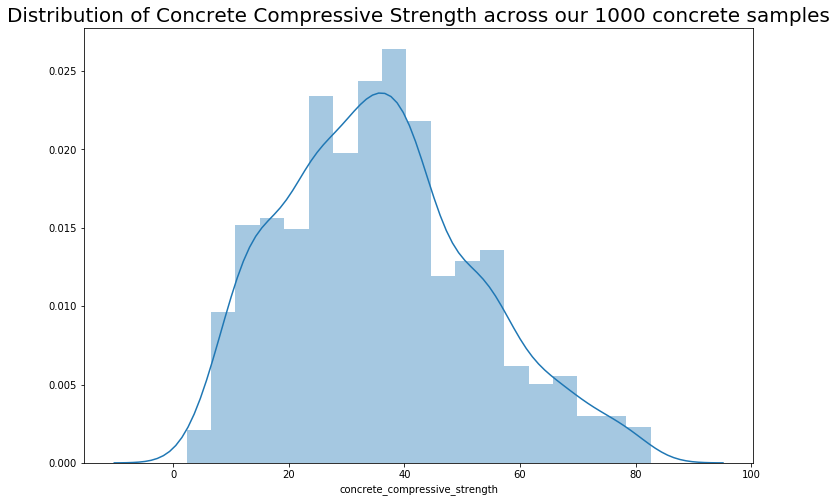

In [7]:
g = sns.distplot(df.concrete_compressive_strength)
g.set_title("Distribution of Concrete Compressive Strength across our 1000 concrete samples", size=20)

Text(0.5, 1.0, 'Distribution of Water across our 1000 concrete samples')

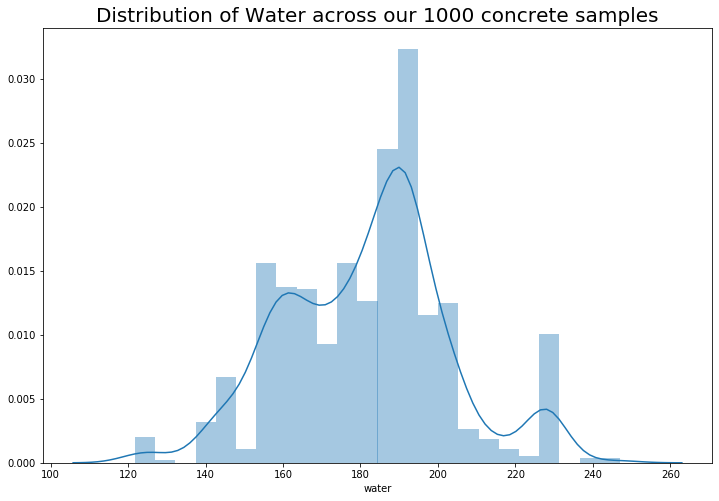

In [8]:
g = sns.distplot(df.water)
g.set_title("Distribution of Water across our 1000 concrete samples", size=20)

Text(0.5, 1.0, 'Distribution of Cement across our 1000 concrete samples')

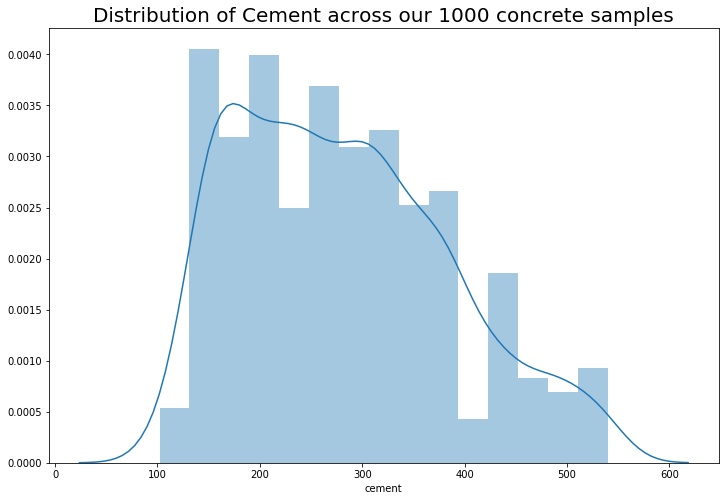

In [9]:
g = sns.distplot(df.cement)
g.set_title("Distribution of Cement across our 1000 concrete samples", size=20)

A boxplot doesn't show as fine grained information as a histogram,  
but contains the median, **quantiles** and outlier information

Text(0.5, 1.0, 'Boxplot of Fine Aggregate across our 1000 concrete samples')

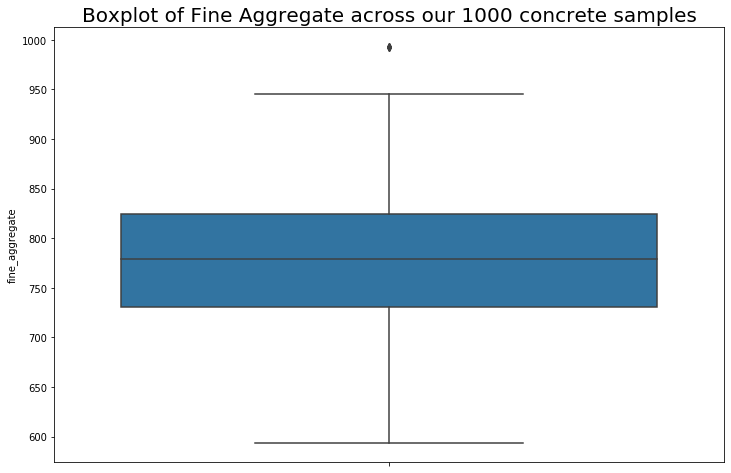

In [10]:
g = sns.boxplot(y=df.fine_aggregate)
g.set_title("Boxplot of Fine Aggregate across our 1000 concrete samples", size=20)

### Bivariate analysis

Text(0.5, 1.0, 'Relation between Water and Concrete Relative Strength for our 1000 concrete samples')

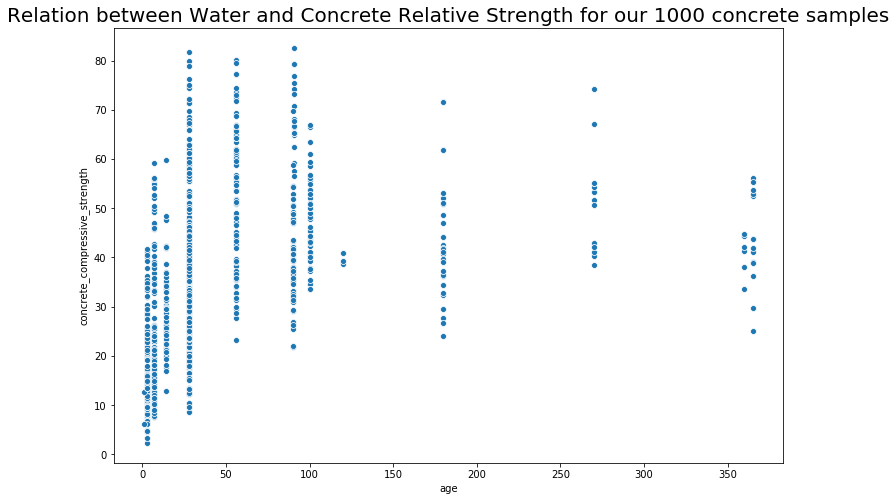

In [11]:
g = sns.scatterplot(df.age, df.concrete_compressive_strength)
g.set_title("Relation between Water and Concrete Relative Strength for our 1000 concrete samples", size=20)

Text(0.5, 1.0, 'Relation between Cement and Concrete Relative Strength for our 1000 concrete samples')

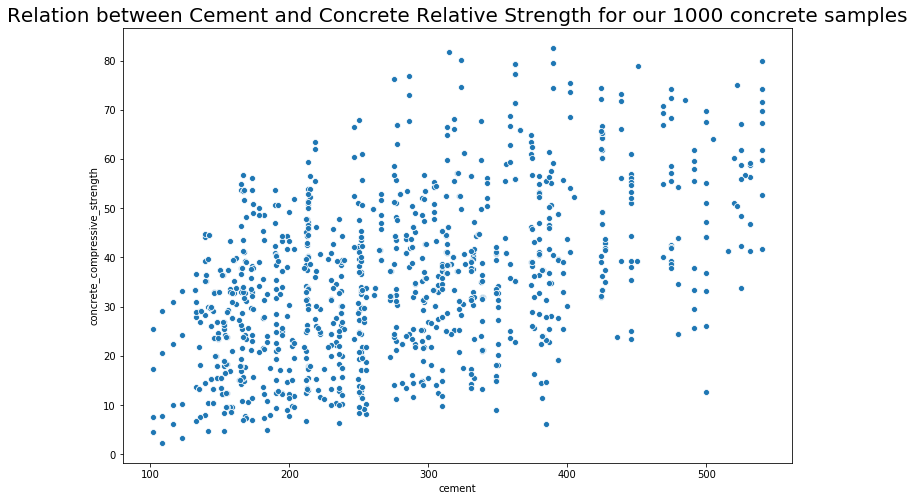

In [12]:
g = sns.scatterplot(df.cement, df.concrete_compressive_strength)
g.set_title("Relation between Cement and Concrete Relative Strength for our 1000 concrete samples", size=20)

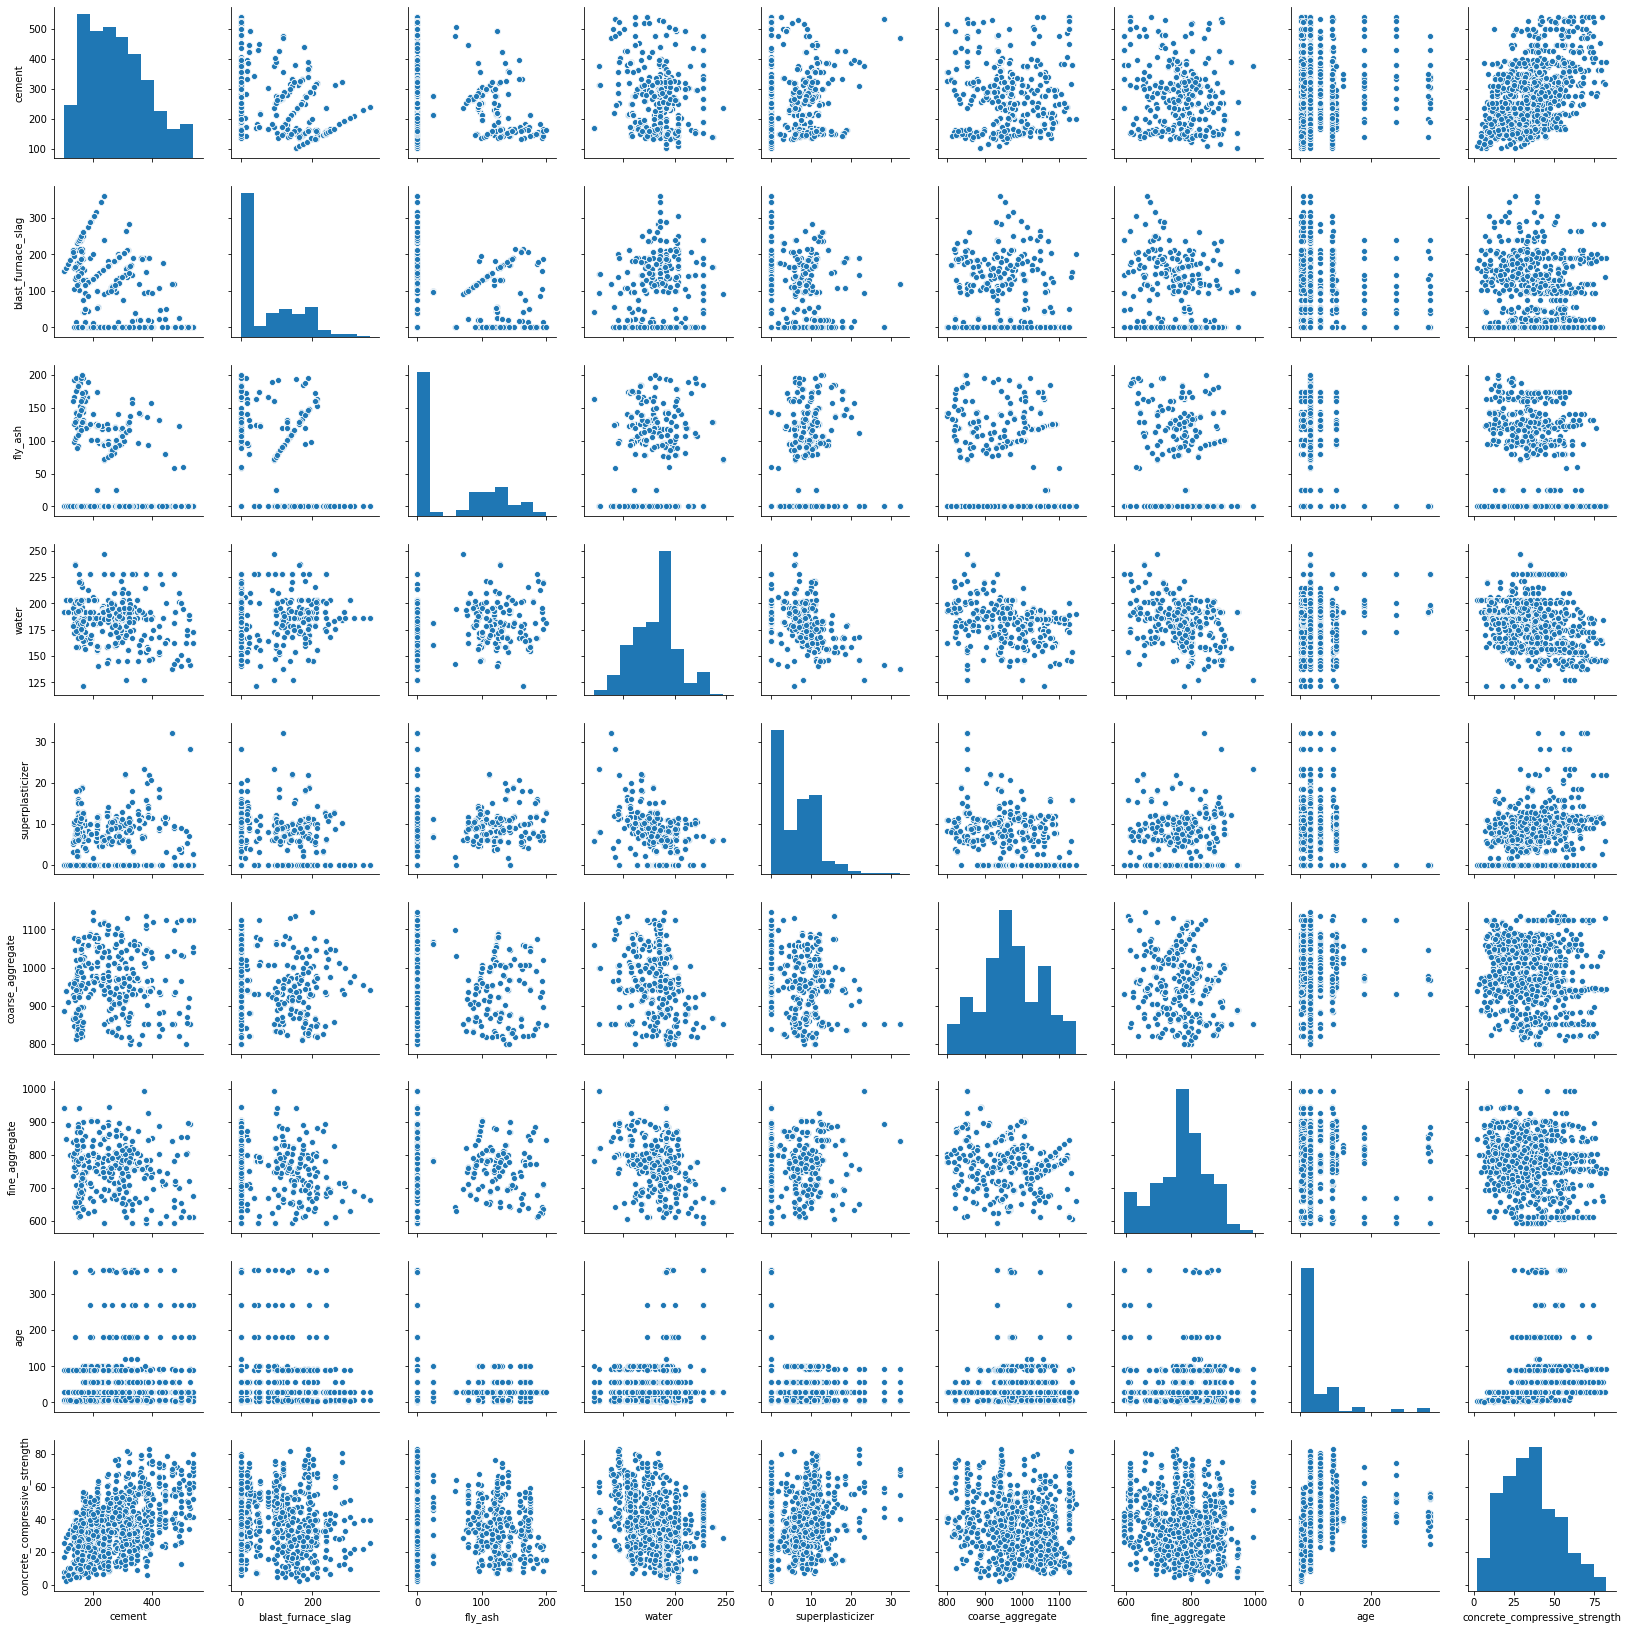

In [13]:
sns.pairplot(df)

#### Correlations

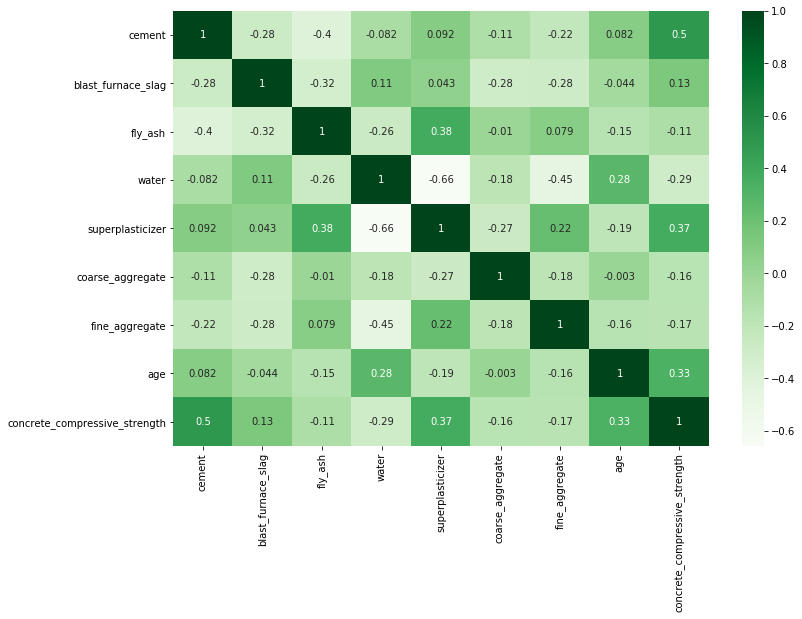

In [14]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr, cmap="Greens", annot=True)

## Predicting `concrete_compressive_strength`

Let's try to predict `concrete_compressive_strength` using the other concrete features

In [15]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin = LinearRegression()

In [18]:
X = df.drop(columns="concrete_compressive_strength")
y = df.concrete_compressive_strength

In [19]:
print(df.shape)
print(X.shape)
print(y.shape)

(1030, 9)
(1030, 8)
(1030,)


In [20]:
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We found the optimal parameters $\beta_i$ modeling this relation

$$\text{strength} = \beta_0 + \beta_1 \cdot \text{cement} + ... + \beta_n \cdot \text{age}$$

In [21]:
pd.Series(lin.coef_, index=X.columns)

cement                0.119804
blast_furnace_slag    0.103866
fly_ash               0.087934
water                -0.149918
superplasticizer      0.292225
coarse_aggregate      0.018086
fine_aggregate        0.020190
age                   0.114222
dtype: float64

We can predict cement strength given its properties

In [22]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [23]:
X.head(1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28


In [24]:
lin.predict(X.head(1))

array([53.46346329])

In [25]:
y.head(1)

0    79.99
Name: concrete_compressive_strength, dtype: float64

We can predict 5 samples at a time

In [26]:
lin.predict(X.head(5)).round(2)

array([53.46, 53.73, 56.81, 67.66, 60.91])

In [27]:
y.head(5)

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: concrete_compressive_strength, dtype: float64

On average, how bad are we doing with our predictions?

An appropiate **metric** for regression models is Mean Squared Error

$y_i$: real strength of concrete sample $i$  
$\hat{y}_i$: predicted strength of concrete sample $i$

$$\text{MSE} = \frac{1}{N} \sum (y_i - \hat{y}_i)^2$$

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# we take root mse (same units as target)
rmse = (mean_squared_error(lin.predict(X), y) ** 0.5).round(2)
rmse

10.35

Text(0, 0.5, 'Predicted concrete strength')

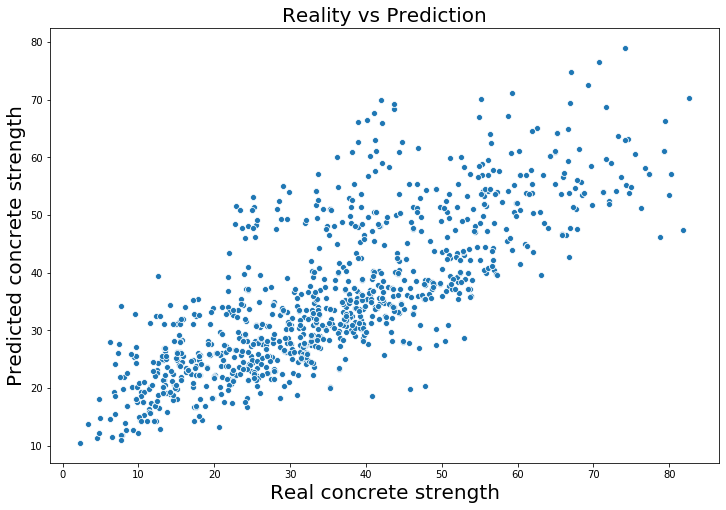

In [30]:
g = sns.scatterplot(y, lin.predict(X))
g.set_title("Reality vs Prediction", size=20)
g.set_xlabel("Real concrete strength", size=20)
g.set_ylabel("Predicted concrete strength", size=20)

### Feature Engineering

I have a Civil Engineering friend. He told me age affects concrete strength nonlinearly.  
I create a new feature, age squared.

In [31]:
df["agesq"] = df["age"] ** 2

I have a chemist friend. He told me the ratio `water/cement` might be a good predictor too.  
I create a new feature, water over cement.

In [32]:
df["water_over_cement"] = df["water"] / df["cement"]

In [33]:
lin = LinearRegression()

In [34]:
X = df.drop(columns="concrete_compressive_strength")
y = df.concrete_compressive_strength

In [35]:
print(df.shape)
print(X.shape)
print(y.shape)

(1030, 11)
(1030, 10)
(1030,)


In [36]:
lin.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We found the optimal parameters $\beta_i$ modeling this relation

$$\text{strength} = \beta_0 + \beta_1 \cdot \text{cement} + ... + \beta_n \cdot \text{age} + \beta_{n+1} \cdot \text{age}^2 + \beta_{n+2} \cdot \text{water_over_cement}$$

In [37]:
pd.Series(lin.coef_, index=X.columns)

cement                0.094597
blast_furnace_slag    0.097959
fly_ash               0.074185
water                -0.145962
superplasticizer      0.196282
coarse_aggregate      0.006464
fine_aggregate        0.010191
age                   0.352042
agesq                -0.000814
water_over_cement    -7.569009
dtype: float64

Are our predictions better?

In [38]:
# we take root mse (same units as target)
rmse = (mean_squared_error(lin.predict(X), y) ** 0.5).round(2)
rmse

8.41

Yes, much better than before!

Text(0, 0.5, 'Predicted concrete strength')

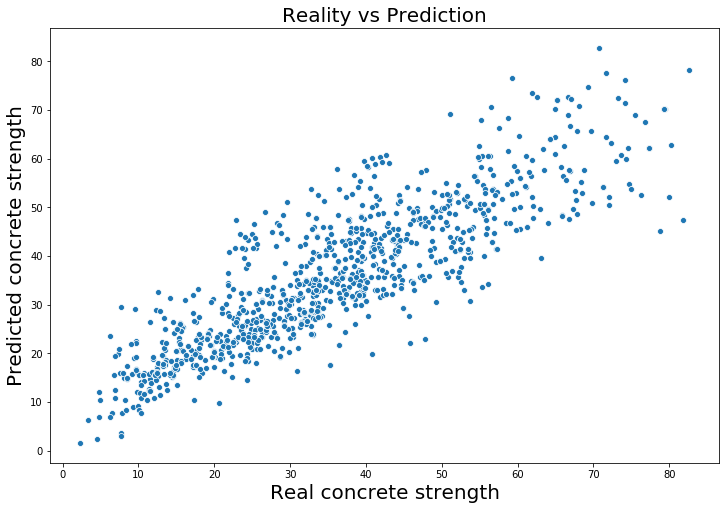

In [39]:
g = sns.scatterplot(y, lin.predict(X))
g.set_title("Reality vs Prediction", size=20)
g.set_xlabel("Real concrete strength", size=20)
g.set_ylabel("Predicted concrete strength", size=20)

### A problem: Overfitting

We are being a bit **optimistic** about the **expected RMSE** we will have on **new samples** of concrete when predicting

Imagine I want to predict Y coord given X coord

<img width=600 src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Overfitted_Data.png/300px-Overfitted_Data.png">

OK fitting model (generalises well)   
vs  
**Overfitting** model (**generalises badly**)

### A honest solution: Train test splitting

1. We leave apart a subset of our dataset (test data, normally 20% of all data)  
2. We train a model on train split
3. We predict on test and compare to real test values
4. We measure expected performance by looking at test predictions/real values

<img width=500 src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png">

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df.drop(columns="concrete_compressive_strength")
y = df.concrete_compressive_strength

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [43]:
X_train.shape

(824, 10)

In [44]:
X_test.shape

(206, 10)

In [45]:
y_train.shape

(824,)

In [46]:
y_test.shape

(206,)

In [47]:
lin = LinearRegression()

We leave apart test samples, and **only train with train samples**

In [48]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now lets see how the model performs on test set!!

In [49]:
lin.predict(X_test.head(5)).round(2)

array([39.87, 61.06, 25.28, 26.9 , 21.8 ])

In [50]:
y_test.head()

447    48.59
483    55.25
413    15.82
653    25.46
945    36.44
Name: concrete_compressive_strength, dtype: float64

In [51]:
# we take root mse (same units as target)
rmse_train = (mean_squared_error(lin.predict(X_train), y_train) ** 0.5).round(2)
rmse_test = (mean_squared_error(lin.predict(X_test), y_test) ** 0.5).round(2)

print(f"Train error: {rmse_train}")
print(f"Test error: {rmse_test}")

Train error: 8.34
Test error: 8.79


The expected error on new samples of concrete to be predicted is around 8.8

### Decision tree

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
from sklearn.tree import plot_tree

#### Depth 3

Lets build another powerful model and compare with Linear Regression

In [54]:
tree = DecisionTreeRegressor(max_depth=3)

In [55]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [56]:
# we take root mse (same units as target)
rmse_train = (mean_squared_error(tree.predict(X_train), y_train) ** 0.5).round(2)
rmse_test = (mean_squared_error(tree.predict(X_test), y_test) ** 0.5).round(2)

print(f"Train error: {rmse_train}")
print(f"Test error: {rmse_test}")

Train error: 9.28
Test error: 11.96


A bit better

What does the tree look like?

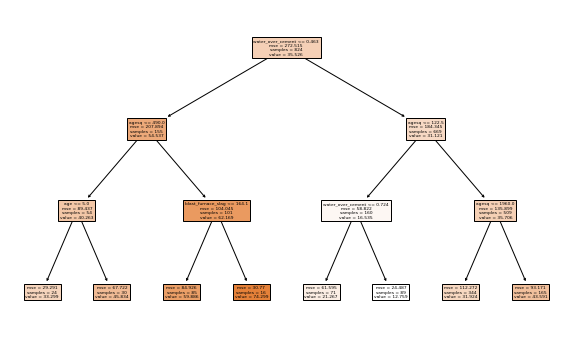

In [57]:
fig = plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, filled=True);

In [58]:
fig.savefig("decision_tree_3.svg")

#### Depth 6

In [59]:
tree = DecisionTreeRegressor(max_depth=6)

In [60]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [61]:
# we take root mse (same units as target)
rmse_train = (mean_squared_error(tree.predict(X_train), y_train) ** 0.5).round(2)
rmse_test = (mean_squared_error(tree.predict(X_test), y_test) ** 0.5).round(2)

print(f"Train error: {rmse_train}")
print(f"Test error: {rmse_test}")

Train error: 5.25
Test error: 7.84


Looks much better

Feature importance tells us which features where more decisive for the prediction

In [62]:
feature_imp = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)

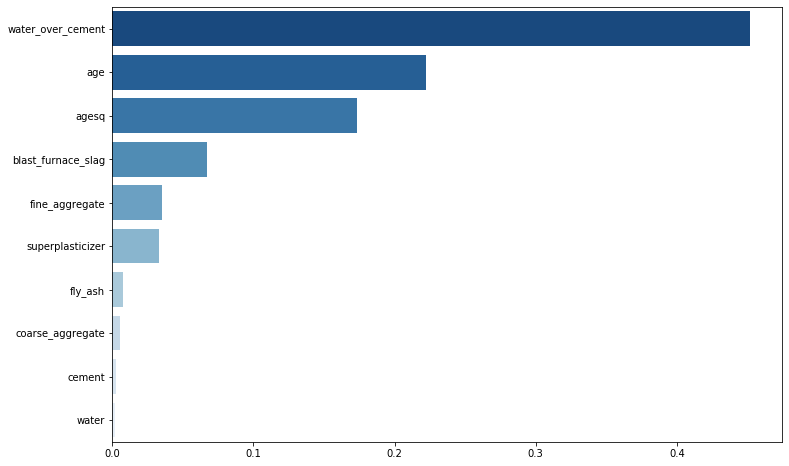

In [63]:
sns.barplot(y=feature_imp.index, x=feature_imp.values, palette="Blues_r")

Text(0, 0.5, 'Predicted concrete strength')

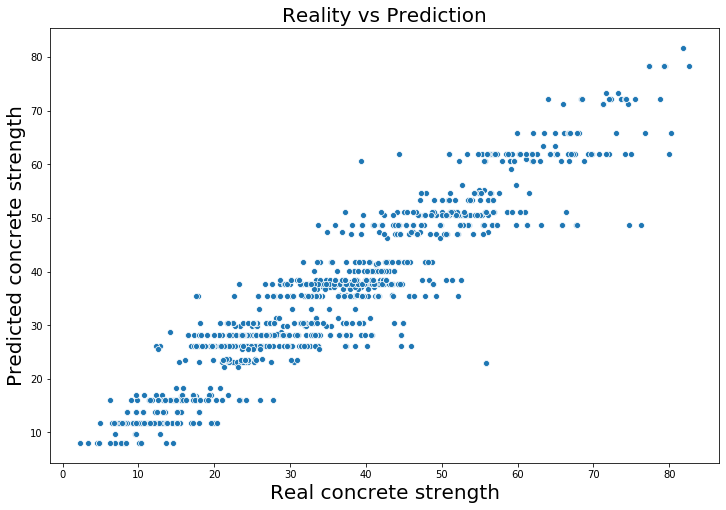

In [64]:
g = sns.scatterplot(y, tree.predict(X))
g.set_title("Reality vs Prediction", size=20)
g.set_xlabel("Real concrete strength", size=20)
g.set_ylabel("Predicted concrete strength", size=20)

#### Depth 15

In [65]:
tree = DecisionTreeRegressor(max_depth=15)

In [66]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [67]:
# we take root mse (same units as target)
rmse_train = (mean_squared_error(tree.predict(X_train), y_train) ** 0.5).round(2)
rmse_test = (mean_squared_error(tree.predict(X_test), y_test) ** 0.5).round(2)

print(f"Train error: {rmse_train}")
print(f"Test error: {rmse_test}")

Train error: 0.62
Test error: 6.94


What happened? **Big overfitting!!**

#### Finding the best tree

In [68]:
errors = []

for d in range(2, 20):

    tree = DecisionTreeRegressor(max_depth=d)

    tree.fit(X_train, y_train)

    # we take root mse (same units as target)
    rmse_train = (mean_squared_error(tree.predict(X_train), y_train) ** 0.5).round(2)
    rmse_test = (mean_squared_error(tree.predict(X_test), y_test) ** 0.5).round(2)
    
    errors.append({
        "depth": d,
        "train_error": rmse_train,
        "test_error": rmse_test
    })

In [69]:
err_df = pd.DataFrame(errors)

In [70]:
err_df

,depth,train_error,test_error
0,2,10.68,13.36
1,3,9.28,11.96
2,4,8.00,10.09
3,5,6.62,8.50
4,6,5.25,7.84
5,7,4.21,7.20
6,8,3.49,7.06
7,9,2.80,6.99
8,10,2.22,7.05
9,11,1.69,7.05


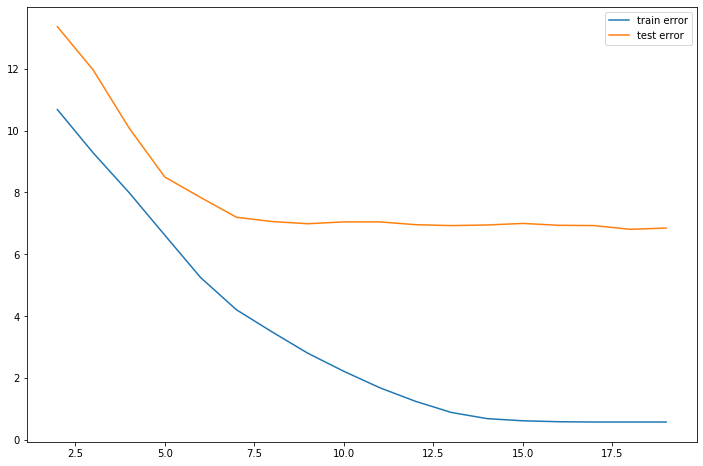

In [71]:
plt.plot(err_df.depth, err_df.train_error, label="train error")
plt.plot(err_df.depth, err_df.test_error, label="test error")
plt.legend()

We should keep `max_depth` around 10, where test error starts to stop decreasing (and in most problems, actually **increasing**)

## Summary

 * Plot individual features to understand your dataset and draw simple conclusions
 * Plot bivariate data to understand correlations
 * Align with industry/business to create interesting new features 

 * Choose an appropiate metric (RMSE in our case)
 * Prevent false optimistic performance expectations by train test splitting
 * Build different models and choose the best one (best performance on test set)

 * Tell a story

**Author**: Manuel López Sheriff  
https://www.linkedin.com/in/sheriff-data/